In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load datasets
s1, r1 = 1711, 63
path1 = f'../data/result/{s1}_{r1}/'
X1 = np.load(path1+'resultX.npy')

s2, r2 = 962, 153
path2 = f'../data/result/{s2}_{r2}/'
X2 = np.load(path2+'resultX.npy')

# print(X1.shape)
X1 = X1.reshape(X1.shape[0], s1+r1, 2)
X2 = X2.reshape(X2.shape[0], s2+r2, 2)
# print(X1.shape)

species = np.load(path1+'species.npy', allow_pickle=True)
region = np.load(path2+'region.npy', allow_pickle=True)

img_path = '../../latex/figures/'


In [4]:
t = 0
Xspecies = X1[:,:s1]
Xregion = X2[:, s2:]
print(Xspecies.shape)
print(Xregion.shape)

# Get the species out 

(17, 1711, 2)
(17, 153, 2)


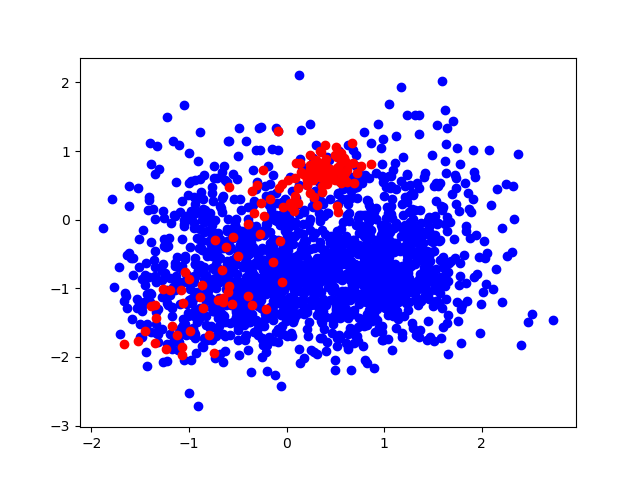

In [17]:
# Make a movie out of this
import matplotlib.animation as animation
%matplotlib widget

fig = plt.figure()


imgs = []
for t in range(Xspecies.shape[0]):
    Xs_curr = Xspecies[t]
    Xr_curr = Xregion[t]
    # fig = plt.figure() # if want to save plots
    
    im1 = plt.scatter(Xs_curr[:,0], Xs_curr[:, 1], c='blue')
    im2 = plt.scatter(Xr_curr[:,0], Xr_curr[:, 1], c='red')
    # if t in [0, 5, 10, 15]:
    #     print('save image')
    #     plt.savefig(f'../../latex/figures/latentspace_tf{t}')
    imgs.append([im1, im2])

ani = animation.ArtistAnimation(fig, imgs, interval=500, blit=True,
                                repeat_delay=1000)
# ani.save('./'+'dynamic_evolution.mp4')

# plt.show()x

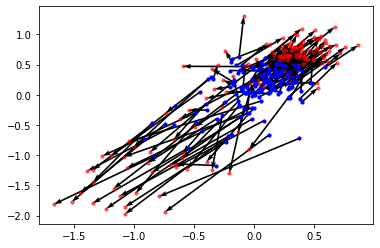

In [5]:
# Plot first and last timestep and arrow for movement
fig, ax = plt.subplots()

to_plot = Xregion
# to_plot = Xspecies

first = to_plot[0]
x1, y1 = first[:,0], first[:,1]
last = to_plot[-1]
x2, y2 = last[:,0], last[:,1]


AB = ax.scatter(x1, y1, c = 'blue', marker = 'o', s = 10, zorder = 3)
CD = ax.scatter(x2, y2, c = 'red', marker = 'o', s = 10, alpha=0.6, zorder = 2)

ax.quiver(x1, y1, (x2-x1), (y2-y1), angles='xy', scale_units='xy', scale=1)
# plt.savefig(f'../../latex/figures/latentspace_afew_region', dpi=600)
plt.show()



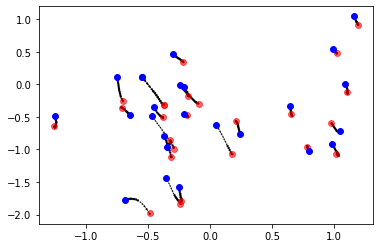

In [7]:
# Plot only a few nodes and whole trajectories
fig, ax = plt.subplots()
idx = np.random.randint(low=0, high=to_plot.shape[1], size=(25))
afew = to_plot[:, idx]


for t in range(0, afew.shape[0]):
    first = afew[t]
    x1, y1 = first[:,0], first[:,1]
    
    if t == 0:
        AB = ax.scatter(x1, y1, c = 'blue', marker = 'o', s = 35, zorder = 3)
    if t == afew.shape[0]-1:
        CD = ax.scatter(x1, y1, c = 'red', marker = 'o', s = 35, alpha=0.6, zorder = 2)
    else:
        last = afew[t+1]
        x2, y2 = last[:,0], last[:,1]

        ax.quiver(x1, y1, (x2-x1), (y2-y1), angles='xy', scale_units='xy', scale=1)

# plt.savefig(f'../../latex/figures/latentspace_afew_region', dpi=600)

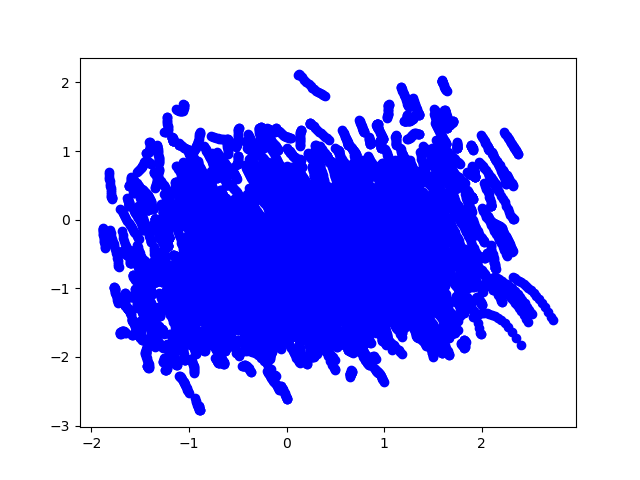

In [6]:
# Make a movie out of this
import matplotlib.animation as animation
%matplotlib widget

fig = plt.figure()

to_plot = Xspecies
imgs = []
for t in range(len(to_plot)):
    Xs_curr = Xspecies[t]
    # Xr_curr = Xregion[t]
    # fig = plt.figure() # if want to save plots
    
    im1 = plt.scatter(Xs_curr[:,0], Xs_curr[:, 1], c='blue')
    # im2 = plt.scatter(Xr_curr[:,0], Xr_curr[:, 1], c='red')
    
    # if t in [0, 5, 10, 15]:
    #     print('save image')
    #     plt.savefig(f'../../latex/figures/latentspace_species_tf{t}')
    imgs.append([im1])

ani = animation.ArtistAnimation(fig, imgs, interval=500, blit=True,
                                repeat_delay=1000)
# ani.save(img_path+'dynamic_evolution.mp4')

plt.show()

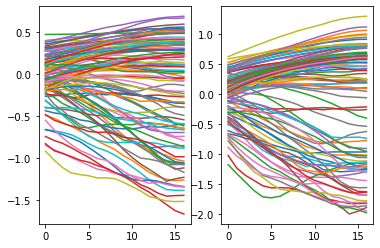

In [8]:
# Plot trajectories
# Xspecies[:,0,:]
to_plot = Xregion
fig = plt.figure()
plt.subplot(121)  
_ = plt.plot(to_plot[:, 1:100, 0])
plt.subplot(122)  # 1 row, 2 columns, Plot 2
_ = plt.plot(to_plot[:, 1:100, 1])

# plt.savefig(f'../../latex/figures/trajectories_region')

In [9]:
# Reshape into trajectories
trajS = Xspecies.transpose(1, 0, 2).reshape(Xspecies.shape[1], Xspecies.shape[0]*Xspecies.shape[2])
trajR = Xregion.transpose(1, 0, 2).reshape(Xregion.shape[1], Xregion.shape[0]*Xregion.shape[2])


In [10]:
from sklearn.cluster import OPTICS, DBSCAN, cluster_optics_dbscan

clust = OPTICS(min_samples=5)
# clust = DBSCAN(eps= 0.3, min_samples=5)
clust.fit(trajS)

OPTICS()

In [10]:
clust.labels_

array([-1, 39, 58, ..., -1, -1, -1])

<BarContainer object of 68 artists>

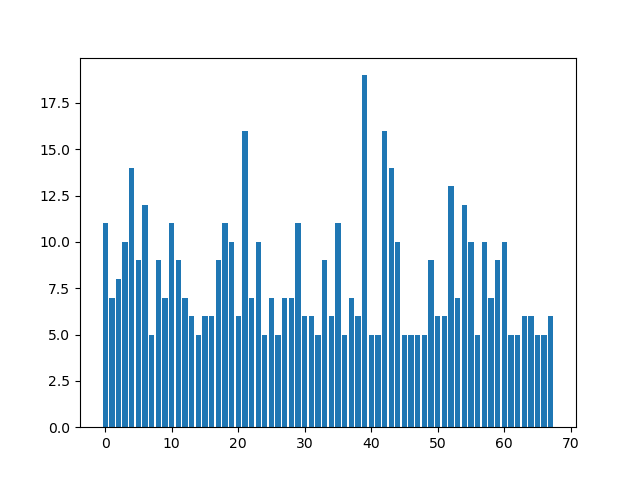

In [11]:
# Analyse size of cluster
unique, counts = np.unique(clust.labels_, return_counts=True)
clust_sz = dict(zip(unique, counts))
del clust_sz[-1]
fig = plt.figure()
mylist = [key for key, val in clust_sz.items() for _ in range(val)]
plt.bar(unique[1:], counts[1:])
# plt.savefig(f'../../latex/figures/cluster_distribution_species', dpi=600)

In [12]:
from collections import Counter
c = Counter(clust_sz)
print(f'There are {len(c)} clusters')
most_common = c.most_common(5)
idxs = [tuple[0] for tuple in most_common]
print(f'Most common indexes {idxs}')


There are 68 clusters
Most common indexes [39, 21, 42, 4, 43]


In [13]:
Xk = to_plot[:, clust.labels_ == 2]
np.mean(Xk[0, :], axis=0)

IndexError: boolean index did not match indexed array along dimension 1; dimension is 153 but corresponding boolean dimension is 1711

In [6]:
# Plot trajectories clusters
import matplotlib
fig = plt.figure()

to_plot = Xspecies
# to_plot = Xregion

def get_col():
    x = np.linspace(0.0, 1, len(c))
    cmap = matplotlib.cm.get_cmap('nipy_spectral')
    col = cmap(x)[np.newaxis, :, :3]
    # print(col[0][0])
    return col[0]
    # cmap = cm.get_cmap(plt.get_cmap('cool'))
colors = get_col()

centroid_first = []
for klass in range(-1, len(c)):
    Xk = to_plot[:, clust.labels_ == klass]
    if klass == -1:
        plt.scatter(Xk[0, :, 0], Xk[0, :, 1], alpha=0.4, c='grey')
    else:
        plt.scatter(Xk[0, :, 0], Xk[0, :, 1], alpha=1, color=colors[klass])
        centroid = np.mean(Xk[0, :], axis=0)
        centroid_first.append(centroid)
        plt.scatter(centroid[0], centroid[1], s=40, c='r', marker='x')
centroid_first = np.array(centroid_first)

centroid_last = []
for klass in range(-1, len(c)):
    Xk = to_plot[:, clust.labels_ == klass]
    if klass == -1:
        plt.scatter(Xk[-1, :, 0], Xk[-1, :, 1], alpha=0.4, c='grey')
    else:
        plt.scatter(Xk[-1, :, 0], Xk[-1, :, 1], alpha=1, color=colors[klass])
        centroid = np.mean(Xk[-1, :], axis=0)
        centroid_last.append(centroid)
        plt.scatter(centroid[0], centroid[1], s=40, c='r', marker='x')
centroid_last = np.array(centroid_last)

x1, y1 = centroid_first[:, 0], centroid_first[:, 1]
x2, y2 = centroid_last[:, 0], centroid_last[:, 1]
plt.quiver(x1, y1, (x2-x1), (y2-y1), angles='xy', scale_units='xy', scale=1)
# plt.savefig(f'../../latex/figures/latentspace_cluster_region', dpi=600)


NameError: name 'c' is not defined

<Figure size 432x288 with 0 Axes>

In [15]:
from dataset import InvasiveSpecies
# And this is how you get the names

InvSpec = InvasiveSpecies( '../data/GlobalAlienSpeciesFirstRecordDatabase_v2.xlsx')
InvSpec.filter_data()

,TaxonName,Family,LifeForm,Region,FirstRecord
0,Acanthophora muscoides,Rhodomelaceae,Algae,Turkey,1986
2,Acanthophora nayadiformis,Rhodomelaceae,Algae,Greece,1861
3,Acanthophora nayadiformis,Rhodomelaceae,Algae,Turkey,1970
6,Acetabularia caliculus,Polyphysaceae,Algae,Israel,1943
7,Acetabularia caliculus,Polyphysaceae,Algae,Spain,1957
...,...,...,...,...,...
61561,Plum pox virus,Potyviridae,Viruses,Tunisia,2002
61562,Plum pox virus,Potyviridae,Viruses,Turkey,1968
61563,Plum pox virus,Potyviridae,Viruses,Ukraine,1967
61564,Plum pox virus,Potyviridae,Viruses,United States,1999


In [19]:
df = InvSpec.df 
family = df[df['TaxonName'] == 'Plum pox virus']['Family'].unique()[0]
print(family)

to_print =  df['LifeForm'].unique()
for el in to_print:
    print(el) 

Potyviridae
Algae
Amphibians
Arthropods p.p. (Myriapods, Diplopods etc.)
Bacteria and protozoans
Birds
Bryophytes
Bryozoa
Crustaceans
Fishes
Fungi
Insects
Invertebrates (excl. Arthropods, Molluscs)
Mammals
Molluscs
Reptiles
Spiders
Vascular plants
Viruses


In [22]:
# Get cluster composition
from dataset import InvasiveSpecies
# And this is how you get the names

from collections import Counter
c = Counter(clust_sz)
most_common = c.most_common(5)
idxs = [tuple[0] for tuple in most_common]
print(f'Most common indexes {idxs}')

for klass in idxs:
    dict = {}

    clusterS = species[clust.labels_ == klass]
    # clusterS = region[clust.labels_ == klass]
    print(f'Taxonomic families for klass {klass} with size {len(clusterS)}')
    for s in clusterS:
        # get taxonomic family of each species
        family = df[df['TaxonName'] == s]['LifeForm'].unique()[0]
        # family = df[df['Region'] == s]['Region'].unique()[0]
        if family in dict.keys():
           dict[family] += 1 
        else:
            dict[family] = 1
    print(f'For cluster {klass}')
    
    for key, el in dict.items():
        print(key, np.round(el/len(clusterS), decimals=2))
        # print(key)

Most common indexes [39, 21, 42, 4, 43]
Taxonomic families for klass 39 with size 19
For cluster 39
Algae 0.11
Crustaceans 0.16
Fishes 0.05
Insects 0.16
Vascular plants 0.53
Taxonomic families for klass 21 with size 16
For cluster 21
Birds 0.06
Insects 0.12
Reptiles 0.06
Vascular plants 0.75
Taxonomic families for klass 42 with size 16
For cluster 42
Crustaceans 0.06
Fishes 0.06
Fungi 0.06
Vascular plants 0.81
Taxonomic families for klass 4 with size 14
For cluster 4
Birds 0.07
Crustaceans 0.07
Insects 0.14
Mammals 0.07
Vascular plants 0.64
Taxonomic families for klass 43 with size 14
For cluster 43
Birds 0.07
Insects 0.36
Vascular plants 0.57


In [ ]:
# Starting points

import tensorflow as tf
n = 17
time_interval = tf.constant(range(1, n+1), dtype =tf.int32)

n_nodes = 1500
d = 2
X_true = np.zeros((n, n_nodes, d))
for i in range(n_nodes):
  for j in range(d):
    X_true[ :, i, j] = (tf.keras.activations.sigmoid(np.random.uniform(-2, 2, 1)*10*(time_interval/n-np.random.uniform(0.2, 0.8, 1))) -0.5)*np.random.uniform(1, 3, 1) + np.random.uniform(-0.5, 0.5, 1)

